Import the Following Libraries:



In [1]:
import sys
from scipy import stats
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree

<div id="downloading_data"> 
    <h2>Import the Data</h2>
    Import data set from jupyter notebook directory
</div>


In [2]:
my_data = pd.read_csv("wdbc.data.mb.csv", delimiter=",",low_memory=False)
my_data

,8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,-1
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,...,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,1
1,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,-1
2,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,-1
3,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,-1
4,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,-1
608,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.155400,0.083400,0.1448,0.05592,...,37.38,162.70,1872.0,0.12230,0.27610,0.41460,0.15630,0.2437,0.08328,1
609,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,0.1551,0.06403,...,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,-1
610,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617,-1


In [54]:
my_data.dtypes

ID                         float64
DIAGNOSIS                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
my_data.columns =['ID', 'DIAGNOSIS', 'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean',
                       'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
                       'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                       'concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',
                       'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
                       'fractal_dimension_worst','LABELS']

In [5]:
my_data

,ID,DIAGNOSIS,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,fractal_dimension_worst,LABELS
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,...,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,1
1,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,-1
2,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,-1
3,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,-1
4,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,-1
608,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.155400,0.083400,0.1448,0.05592,...,37.38,162.70,1872.0,0.12230,0.27610,0.41460,0.15630,0.2437,0.08328,1
609,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,0.1551,0.06403,...,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,-1
610,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617,-1


# Normalization refers to rescaling real-valued numeric attributes into a 0
#0
# to 1
#1
 #range.

#Data normalization is used in machine learning to make model training less sensitive 
#to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.

In [6]:
from sklearn import preprocessing

In [7]:
normalized = preprocessing.normalize(my_data)
print("Normalized Data = ", normalized)

Normalized Data =  [[ 1.40186635e-02  1.98624344e-02  9.15204776e-02 ...  4.15131266e-04
   1.25497375e-04  1.06443914e-03]
 [ 1.61481279e-02  1.96055694e-02  1.04580905e-01 ...  3.68123713e-04
   1.11241170e-04 -1.34009360e-03]
 [ 1.48724556e-02  2.45853046e-02  9.58165393e-02 ...  3.16522016e-04
   7.62585436e-05 -1.10248003e-03]
 ...
 [ 2.13958149e-02  3.55814169e-02  1.34654752e-01 ...  6.16580556e-04
   1.82894298e-04 -2.23641841e-03]
 [ 1.48215233e-02  2.24488503e-02  9.48556360e-02 ...  2.35158309e-04
   8.04672435e-05 -1.05641648e-03]
 [ 6.82948931e-03  7.93586069e-03  4.51670232e-02 ...  9.13050638e-05
   2.55318736e-05  2.94247708e-04]]


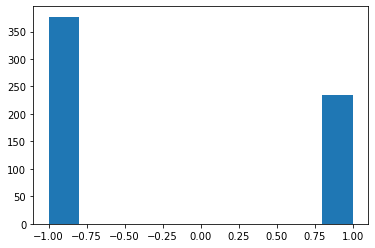

In [8]:
from matplotlib import pyplot as plt
plt.hist(my_data['LABELS'])
plt.show()

In [59]:
my_data["LABELS"].value_counts()

-1    377
 1    235
Name: LABELS, dtype: int64

(array([377.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 235.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

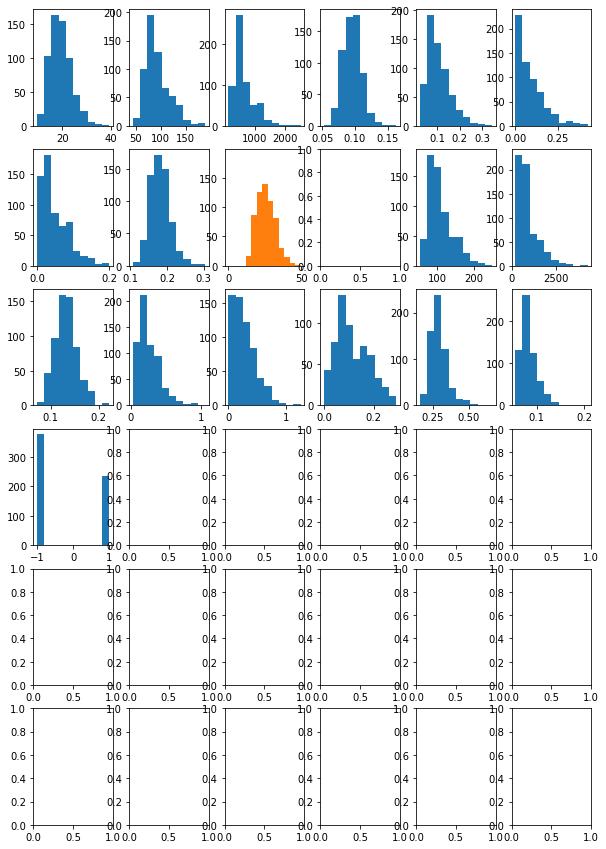

In [9]:
fig, ax=plt.subplots(6,6, figsize=(10,15))
ax[0,0].hist(my_data['DIAGNOSIS'])
ax[0,1].hist(my_data['radius_mean'])
ax[0,2].hist(my_data['texture_mean'])
ax[0,3].hist(my_data['perimeter_mean'])
ax[0,4].hist(my_data['area_mean'])
ax[0,5].hist(my_data['smoothness_mean'])
ax[1,0].hist(my_data['compactness_mean'])
ax[1,1].hist(my_data['concavity_mean'])
ax[1,2].hist(my_data['concave points_mean'])
ax[1,2].hist(my_data['fractal_dimension_se'])
ax[1,4].hist(my_data['radius_worst'])
ax[1,5].hist(my_data['texture_worst'])
ax[2,0].hist(my_data['perimeter_worst'])
ax[2,1].hist(my_data['area_worst'])
ax[2,2].hist(my_data['smoothness_worst'])
ax[2,3].hist(my_data['compactness_worst'])
ax[2,4].hist(my_data['concavity_worst'])
ax[2,5].hist(my_data['fractal_dimension_worst'])
ax[3,0].hist(my_data['LABELS'])

In [10]:
my_data["LABELS"].value_counts()

-1    377
 1    235
Name: LABELS, dtype: int64

(array([377.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 235.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

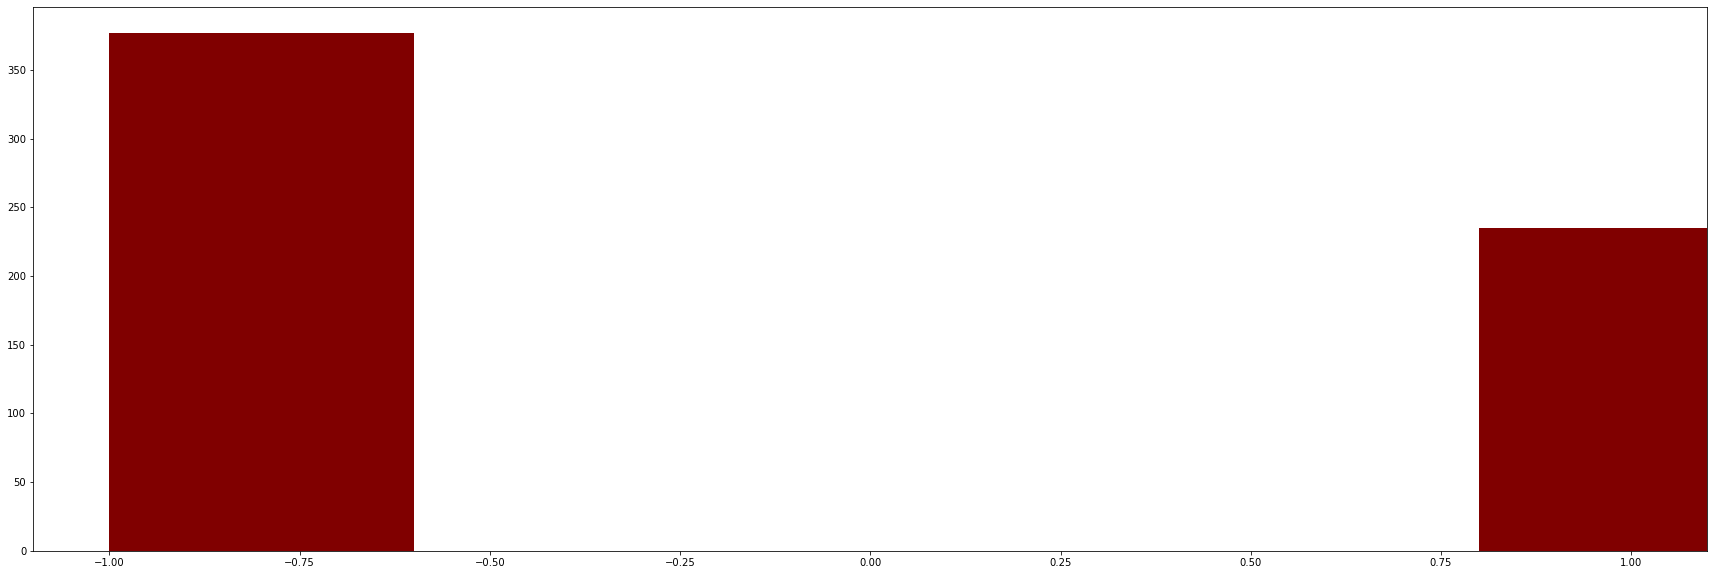

In [11]:
fig = plt.figure(figsize = (30, 10))
plt.hist(my_data["LABELS"], color ='maroon',width = 0.4)

In [12]:
#catagoryrange=["[{0} - {1}]".format(Attack_type,Attack_type +1.0) for Attack_type in range(1,6,1)]
#catagoryrange

In [13]:
#Attack_typerange=len(catagoryrange)
#Attack_typerange

In [14]:
#data["Attack_typerange"]=pd.cut(x=data["Attack_type"],bins=Attack_typerange,labels=catagoryrange)

In [15]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       612 non-null    float64
 1   DIAGNOSIS                612 non-null    float64
 2   radius_mean              612 non-null    float64
 3   texture_mean             612 non-null    float64
 4   perimeter_mean           612 non-null    float64
 5   area_mean                612 non-null    float64
 6   smoothness_mean          612 non-null    float64
 7   compactness_mean         612 non-null    float64
 8   concavity_mean           612 non-null    float64
 9   concave points_mean      612 non-null    float64
 10  symmetry_mean            612 non-null    float64
 11  fractal_dimension_mean   612 non-null    float64
 12  radius_se                612 non-null    float64
 13  texture_se               612 non-null    float64
 14  perimeter_se             6

In [16]:
my_data.isna().sum()

ID                         0
DIAGNOSIS                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
fractal_dimension_worst    0
LABELS                     0
dtype: int64

In [17]:
#data= data[pd.to_numeric(data['arp.dst.proto_ipv4'], errors='coerce').notnull()]
#data['arp.dst.proto_ipv4'] = data['arp.dst.proto_ipv4'].astype('float')
#data.dtypes

In [18]:
X=my_data.drop(['LABELS'], axis='columns')
X

,ID,DIAGNOSIS,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,fractal_dimension_worst
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
1,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
2,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
3,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
4,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
608,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.155400,0.083400,0.1448,0.05592,...,24.47,37.38,162.70,1872.0,0.12230,0.27610,0.41460,0.15630,0.2437,0.08328
609,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,0.1551,0.06403,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
610,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.33,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617


Now we can fill the target variable.


In [19]:
#y=data["target"]
y=my_data.LABELS
y

0      1
1     -1
2     -1
3     -1
4     -1
      ..
607   -1
608    1
609   -1
610   -1
611    1
Name: LABELS, Length: 612, dtype: int64

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


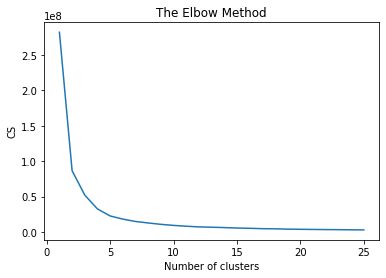

In [20]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 26), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_train, X_test, y_train, y_test <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.33, and random_state=42 <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (428, 30) &  Size of Y training set (428,)


In [24]:
print('Shape of X training set {}'.format(X_test.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (184, 30) &  Size of Y training set (184,)


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


# For K value =1

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
regressor = KNeighborsRegressor(n_neighbors=1)

In [29]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
y_pred

array([-1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.043478260869565216
mse: 0.08695652173913043
rmse: 0.29488391230979427


In [34]:
regressor.score(X_test, y_test)

0.9106687704818546

In [35]:
y.describe()

count    612.000000
mean      -0.232026
std        0.973505
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: LABELS, dtype: float64

In [36]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

In [37]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Mean Absolute Error')

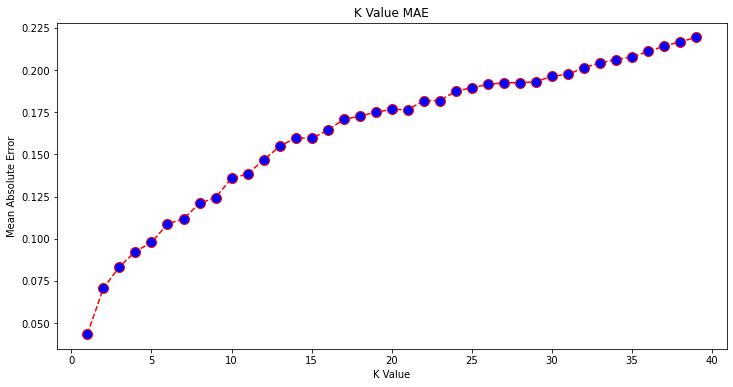

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

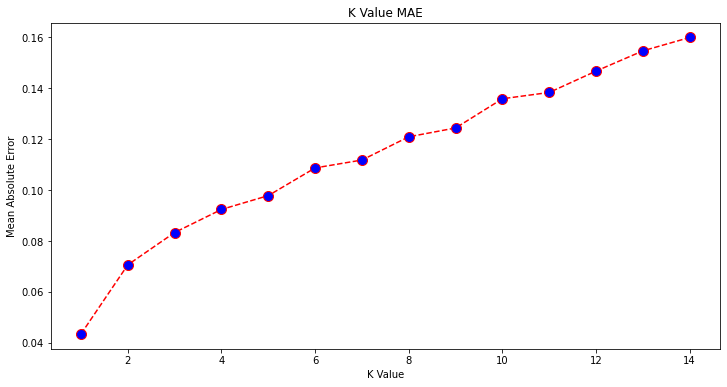

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [40]:
import numpy as np 

print(min(error))               
print(np.array(error).argmin())

0.043478260869565216
0


In [41]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.869725290286038, 
mae: 0.14673913043478262 
mse: 0.12681159420289856 
rmse: 0.35610615580595983


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [43]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       107
           1       1.00      0.90      0.95        77

    accuracy                           0.96       184
   macro avg       0.97      0.95      0.95       184
weighted avg       0.96      0.96      0.96       184



# For K value =3

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
regressor = KNeighborsRegressor(n_neighbors=3)

In [46]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred = regressor.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [50]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          -1       0.96      0.99      0.98       107
           1       0.99      0.95      0.97        77

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



# FOR K VALUE 5

In [51]:
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       107
           1       1.00      0.92      0.96        77

    accuracy                           0.97       184
   macro avg       0.97      0.96      0.97       184
weighted avg       0.97      0.97      0.97       184



# FOR K VALUE 7

In [52]:
classifier7 = KNeighborsClassifier(n_neighbors=7)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       107
           1       1.00      0.91      0.95        77

    accuracy                           0.96       184
   macro avg       0.97      0.95      0.96       184
weighted avg       0.96      0.96      0.96       184



# FOR K VALUE 9

In [53]:
classifier9 = KNeighborsClassifier(n_neighbors=9)
classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       107
           1       1.00      0.91      0.95        77

    accuracy                           0.96       184
   macro avg       0.97      0.95      0.96       184
weighted avg       0.96      0.96      0.96       184

